In [288]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tslearn.clustering import KShape
import numpy as np
from sklearn import tree

In [289]:
Restriction = '3-SD'
numberOfFeatures2 = numberOfWindows = 10
ep = 175
ep_es = 25

In [290]:
FeatureSetB1 = pd.read_csv('Windows/mitbih_10Ws.csv')
FeatureSetB1.drop("Unnamed: 0",axis=1,inplace = True)
FeatureSetB1 = FeatureSetB1.drop('index', axis=1)
tree = tree.DecisionTreeClassifier()

In [291]:
FeatureSetB2 = FeatureSetB1.sample(frac=1)

In [292]:
import pandas as pd
import numpy as np

B_class_0 = FeatureSetB2[FeatureSetB2['Class'] == 0]
B_class_1 = FeatureSetB2[FeatureSetB2['Class'] == 1]
B_class_2 = FeatureSetB2[FeatureSetB2['Class'] == 2]
B_class_3 = FeatureSetB2[FeatureSetB2['Class'] == 3]
B_class_4 = FeatureSetB2[FeatureSetB2['Class'] == 4]


# Calculate the Z-scores for each feature
z_score_0 = (B_class_0 - B_class_0.mean()) / B_class_0.std()
z_score_1 = (B_class_1 - B_class_1.mean()) / B_class_1.std()
z_score_2 = (B_class_2 - B_class_2.mean()) / B_class_2.std()
z_score_3 = (B_class_3 - B_class_3.mean()) / B_class_3.std()
z_score_4 = (B_class_4 - B_class_4.mean()) / B_class_4.std()

# Set a threshold for the Z-score
threshold_0 = 2
threshold_1 = 2.75
threshold_2 = 2.75
threshold_3 = 2.75
threshold_4 = 2.75

# Identify the outliers based on the threshold
outliers_0 = np.abs(z_score_0) > threshold_0
outliers_1 = np.abs(z_score_1) > threshold_1
outliers_2 = np.abs(z_score_2) > threshold_2
outliers_3 = np.abs(z_score_3) > threshold_3
outliers_4 = np.abs(z_score_4) > threshold_4

# Remove the outliers from the dataset
B_class_0 = B_class_0[~outliers_0.any(axis=1)]
B_class_1 = B_class_1[~outliers_1.any(axis=1)]
B_class_2 = B_class_2[~outliers_2.any(axis=1)]
B_class_3 = B_class_3[~outliers_3.any(axis=1)]
B_class_4 = B_class_4[~outliers_4.any(axis=1)]

# Split the dataset into two classes and perform clustering as described in the previous answer
merged_df = pd.concat([B_class_0,B_class_1,B_class_2,B_class_3,B_class_4])
merged_df = merged_df.sample(frac=1)

In [293]:
X = FeatureSetB2.iloc[:, :-2]
y = FeatureSetB2[['Class']]

In [294]:
# Calculate the number of samples in the majority class
sampling_strategy = {1: 20000, 2: 20000, 3: 20000, 4:20000}

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
ros2 = RandomUnderSampler(sampling_strategy= {0:40000})

# X,y = ros.fit_resample(X,y)
# x,y = ros2.fit_resample(X,y)

In [295]:
X_train1, X_test, y_train1, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

X_train1,y_train1 = ros.fit_resample(X_train1,y_train1)
x,y = ros2.fit_resample(X_train1,y_train1)

X_train2, X_val, y_train2, y_val = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y, shuffle=True)


Rye - Artificial Neural Network 

In [296]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, Activation
from sklearn import metrics
from keras.layers import LSTM
import tensorflow as tf
import sys
mod=sys.modules[__name__]

In [297]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = ep_es, mode='min',restore_best_weights=True)

acc_score = []
re_score = []
pre_score = []
history_1 = []
f_score = []
auroc_score = []
auprc_score = []

In [298]:
model = Sequential()
model.add(tf.keras.Input(shape=(numberOfFeatures2,))) #(numberOfFeatures,)

model.add(Dense(128))
#model.add(Dropout(0.8))
model.add(Activation('relu'))

model.add(Dense(64))
#model.add(Dropout(0.5))
model.add(Activation('relu'))

# model.add(Dense(16))
# #model.add(Dropout(0.5))
# model.add(Activation('relu'))

model.add(Dense(5, activation='softmax'))
model.summary()
#opt = tf.keras.optimizers.SGD(learning_rate=0.0045, momentum=0.95)
opt = tf.keras.optimizers.Adam(learning_rate=0.045)#, decay=1e-3) #If validation is not following training in trend then the learning rate might be too high
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])#focal_loss_custom(alpha=0.2, gamma=2) #'binary_crossentropy'#focal_loss_custom(alpha=0.25, gamma=2)


#scaler = preprocessing.StandardScaler().fit(X_train)
#scaler = preprocessing.RobustScaler().fit(X_train)
#scaler =  preprocessing.MinMaxScaler().fit(X_train)
scaler = preprocessing.Normalizer().fit(X_train2)

X_train4 = scaler.transform(X_train2)
X_test4 = scaler.transform(X_test)
X_val4 = scaler.transform(X_val)

y_train2 = to_categorical(y_train2)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


history = model.fit(X_train4,y_train2, epochs = ep,batch_size=1024,validation_data=(X_val4, y_val), callbacks=[stop_early],shuffle=True)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               1408      
                                                                 
 activation_40 (Activation)  (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 activation_41 (Activation)  (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 5)                 325       
                                                                 
Total params: 9,989
Trainable params: 9,989
Non-trainable params: 0
_________________________________________________________________
Epoch 1/175


2023-03-20 19:27:45.069859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


93/94 [============================>.] - ETA: 0s - loss: 0.9209 - accuracy: 0.6524

2023-03-20 19:27:46.715300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 2s 20ms/step - loss: 0.9193 - accuracy: 0.6530 - val_loss: 0.6728 - val_accuracy: 0.7562
Epoch 2/175
94/94 [==============================] - 2s 18ms/step - loss: 0.6252 - accuracy: 0.7737 - val_loss: 0.5694 - val_accuracy: 0.7935
Epoch 3/175
94/94 [==============================] - 2s 17ms/step - loss: 0.5596 - accuracy: 0.7970 - val_loss: 0.5330 - val_accuracy: 0.8051
Epoch 4/175
94/94 [==============================] - 1s 15ms/step - loss: 0.5250 - accuracy: 0.8106 - val_loss: 0.5283 - val_accuracy: 0.8074
Epoch 5/175
94/94 [==============================] - 1s 15ms/step - loss: 0.5011 - accuracy: 0.8183 - val_loss: 0.5411 - val_accuracy: 0.8074
Epoch 6/175
94/94 [==============================] - 1s 15ms/step - loss: 0.4950 - accuracy: 0.8213 - val_loss: 0.4765 - val_accuracy: 0.8296
Epoch 7/175
94/94 [==============================] - 1s 16ms/step - loss: 0.4743 - accuracy: 0.8273 - val_loss: 0.4514 - val_accuracy: 0.8389
Epoch 8/175
94/94 

In [299]:
# Make predictions on test data
y_pred = model.predict(X_test4)

# Convert probabilities to one-hot encoded vectors
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

2023-03-20 19:30:38.114164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [300]:
# Calculate F1 score macro and Precision macro
f1_value = f1_score(y_test_classes, y_pred_classes, average='macro')
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
sensitivity = recall_score(y_test_classes, y_pred_classes,average='macro')#,pos_label = 1, average='binary')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

acc_score.append(accuracy)
re_score.append(sensitivity)
pre_score.append(precision)
f_score.append(f1_value)

k = 1 

avg_acc_score = sum(acc_score)/k
avg_recall_score = sum(re_score)/k
avg_precision_score = sum(pre_score)/k
avg_f1_score = sum(f_score)/k

sensitivity = avg_recall_score
precision = avg_precision_score
accuracy = avg_acc_score
f1_score = avg_f1_score


In [301]:
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
#print('Recall of each fold - {}'.format(re_score))
print('Avg Reccall : {}'.format(avg_recall_score))
#print('Precision of each fold - {}'.format(pre_score))
print('Avg Precision : {}'.format(avg_precision_score))
#print('F1_Score of each fold - {}'.format(f_score))
print('Avg F1_score : {}'.format(avg_f1_score))

Avg accuracy : 0.8598382749326146
Avg Reccall : 0.8306539360243098
Avg Precision : 0.579895279571959
Avg F1_score : 0.6360034336352889


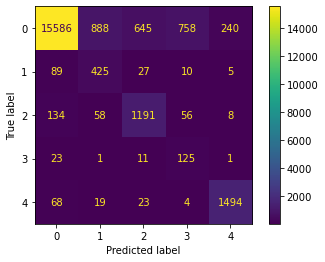

array([0.86029696, 0.76438849, 0.82308224, 0.77639752, 0.92910448])

In [302]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = matrix2 = confusion_matrix(y_test_classes, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix2)
cm_display.plot()
plt.show()
matrix.diagonal()/matrix.sum(axis=1)

In [303]:
Accuracies = matrix.diagonal()/matrix.sum(axis=1)

Less3 = Accuracies[0]
Greater3 = Accuracies[1]

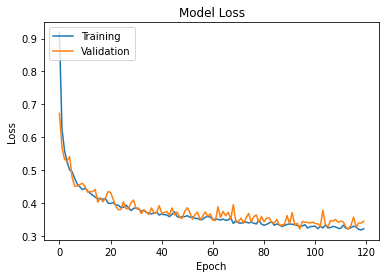

In [304]:
# Plot the accuracy of the model during training

#plt.plot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

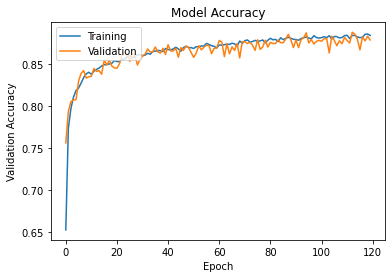

In [305]:
# Plot the accuracy of the model during training

#plt.plot()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [306]:
Accuracies = matrix.diagonal()/matrix.sum(axis=1)

accuracy = (Greater3+Less3)/2

In [307]:
import csv
import os.path
from datetime import datetime

csv_columns = ['model-type','precision','sensitivity','f1-score','accuracy','NumberOfWindows','Epochs','Run_Time','Restriction','Acc_Lesser','Acc_Greater']
dict_data = [{'model-type':'ANN', 'precision': precision,'sensitivity': sensitivity,'f1-score': f1_score,'accuracy': accuracy,'NumberOfWindows':numberOfWindows,"Epochs":ep,'Restriction' : Restriction,'Acc_Lesser':Less3,'Acc_Greater':Greater3}]
metric_file = "Results_Apr3/mitbih_ANN_1.csv"

file_exists = os.path.isfile(metric_file)
try:
    with open(metric_file, 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        if not file_exists:
            writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
    print("I/O error")